In [24]:
import pandas as pd
import numpy as np
import matplotlib 
from matplotlib import pyplot

dates = pd.date_range('20150201', periods=6)
np.random.seed(0)
df = pd.DataFrame(np.random.randn(6,4), index=dates, columns=list('ABCD'))
df

,A,B,C,D
2015-02-01,1.764052,0.400157,0.978738,2.240893
2015-02-02,1.867558,-0.977278,0.950088,-0.151357
2015-02-03,-0.103219,0.410599,0.144044,1.454274
2015-02-04,0.761038,0.121675,0.443863,0.333674
2015-02-05,1.494079,-0.205158,0.313068,-0.854096
2015-02-06,-2.552990,0.653619,0.864436,-0.742165


In [25]:
print(df.apply(lambda x:x+1))

                   A         B         C         D
2015-02-01  2.764052  1.400157  1.978738  3.240893
2015-02-02  2.867558  0.022722  1.950088  0.848643
2015-02-03  0.896781  1.410599  1.144044  2.454274
2015-02-04  1.761038  1.121675  1.443863  1.333674
2015-02-05  2.494079  0.794842  1.313068  0.145904
2015-02-06 -1.552990  1.653619  1.864436  0.257835


In [26]:
s = pd.Series(np.random.randint(0, 7, size=10))
print(s)
print(s.value_counts())

0    4
1    2
2    0
3    0
4    4
5    5
6    5
7    6
8    0
9    4
dtype: int32
4    3
0    3
5    2
6    1
2    1
dtype: int64


In [27]:
piece = [df[0:3],df[3:]]
print(piece[0],'\n',piece[1])
print(pd.concat(piece))

                   A         B         C         D
2015-02-01  1.764052  0.400157  0.978738  2.240893
2015-02-02  1.867558 -0.977278  0.950088 -0.151357
2015-02-03 -0.103219  0.410599  0.144044  1.454274 
                    A         B         C         D
2015-02-04  0.761038  0.121675  0.443863  0.333674
2015-02-05  1.494079 -0.205158  0.313068 -0.854096
2015-02-06 -2.552990  0.653619  0.864436 -0.742165
                   A         B         C         D
2015-02-01  1.764052  0.400157  0.978738  2.240893
2015-02-02  1.867558 -0.977278  0.950088 -0.151357
2015-02-03 -0.103219  0.410599  0.144044  1.454274
2015-02-04  0.761038  0.121675  0.443863  0.333674
2015-02-05  1.494079 -0.205158  0.313068 -0.854096
2015-02-06 -2.552990  0.653619  0.864436 -0.742165


In [65]:
p1 = pd.DataFrame({'owner':['sam','sam','jack'],'dog':['No.1','No.2','No.1']})
p2 = pd.DataFrame({'owner':['jack','jack','sam','sam'],'cat':['No.1','No.2','No.1','No.2']})
print(pd.merge(p1, p2,on='owner'))

    dog owner   cat
0  No.1   sam  No.1
1  No.1   sam  No.2
2  No.2   sam  No.1
3  No.2   sam  No.2
4  No.1  jack  No.1
5  No.1  jack  No.2


In [73]:
p1 = pd.DataFrame({'money':[1,2,3],'owner':['sam','sam','sam']})
p2 = pd.DataFrame({'money':[1,3],'owner':['jack','jack']})
print(p1)
print(p2)
p12 = pd.concat([p1,p2])
print(p12.groupby('owner').sum())

   money owner
0      1   sam
1      2   sam
2      3   sam
   money owner
0      1  jack
1      3  jack
       money
owner       
jack       4
sam        6


In [122]:
tuples = list(zip(*[['bar', 'bar', 'baz', 'baz',
                     'foo', 'foo', 'qux', 'qux'],
                   ['one', 'two', 'one', 'two',
                     'one', 'two', 'one', 'two'],
                   ['one1', 'two1', 'one1', 'two1',
                     'one1', 'two1', 'one1', 'two1']]))
index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second','third'])
df2 = pd.DataFrame(np.random.randn(8, 2), index=index, columns=['A', 'B'])
print(df2)

                           A         B
first second third                    
bar   one    one1  -1.895953  0.324685
      two    two1  -0.327675  0.503068
baz   one    one1   1.005549  0.574686
      two    two1   1.556680 -0.418918
foo   one    one1  -0.409717  1.116375
      two    two1  -0.250979 -0.415228
qux   one    one1  -0.639086  2.497768
      two    two1  -3.005128 -0.873997


In [123]:
stacked = df2.stack()
print(stacked)

first  second  third   
bar    one     one1   A   -1.895953
                      B    0.324685
       two     two1   A   -0.327675
                      B    0.503068
baz    one     one1   A    1.005549
                      B    0.574686
       two     two1   A    1.556680
                      B   -0.418918
foo    one     one1   A   -0.409717
                      B    1.116375
       two     two1   A   -0.250979
                      B   -0.415228
qux    one     one1   A   -0.639086
                      B    2.497768
       two     two1   A   -3.005128
                      B   -0.873997
dtype: float64


In [125]:
print(stacked.unstack().unstack())

                     A                   B          
third             one1      two1      one1      two1
first second                                        
bar   one    -1.895953       NaN  0.324685       NaN
      two          NaN -0.327675       NaN  0.503068
baz   one     1.005549       NaN  0.574686       NaN
      two          NaN  1.556680       NaN -0.418918
foo   one    -0.409717       NaN  1.116375       NaN
      two          NaN -0.250979       NaN -0.415228
qux   one    -0.639086       NaN  2.497768       NaN
      two          NaN -3.005128       NaN -0.873997


In [118]:
print(stacked.unstack().unstack())

               A                   B          
second       one       two       one       two
first                                         
bar    -1.733742 -0.954634 -0.615564 -0.248805
baz    -0.055088 -1.894318  0.282070  0.838311
foo    -0.416312 -1.197659  1.356928 -1.677046
qux     1.011233 -0.217235 -0.728128  0.530017


In [120]:
list(zip(*[[1,2,3],[4,5,6],[7,8,9]]))

[(1, 4, 7), (2, 5, 8), (3, 6, 9)]

In [130]:
print(pd.pivot_table(df2, values='A', index=['first'], columns=['second']))

second       one       two
first                     
bar    -1.895953 -0.327675
baz     1.005549  1.556680
foo    -0.409717 -0.250979
qux    -0.639086 -3.005128


In [131]:
print(pd.pivot_table(df2, values=['A','B'], index=['first'], columns=['second']))

               A                   B          
second       one       two       one       two
first                                         
bar    -1.895953 -0.327675  0.324685  0.503068
baz     1.005549  1.556680  0.574686 -0.418918
foo    -0.409717 -0.250979  1.116375 -0.415228
qux    -0.639086 -3.005128  2.497768 -0.873997


In [132]:
df3 = pd.DataFrame({"id":[1,2,3,4,5,6], "raw_grade":['a', 'b', 'b', 'a', 'a', 'e']})


,id,raw_grade
0,1,a
1,2,b
2,3,b
3,4,a
4,5,a
5,6,e


In [139]:
df3["grade"] = df3["raw_grade"].astype("category")
print(df3,'\n')
df3["grade"].cat.categories = ["very good", "good", "very bad"]
print(df3)

   id raw_grade grade
0   1         a     a
1   2         b     b
2   3         b     b
3   4         a     a
4   5         a     a
5   6         e     e 

   id raw_grade      grade
0   1         a  very good
1   2         b       good
2   3         b       good
3   4         a  very good
4   5         a  very good
5   6         e   very bad


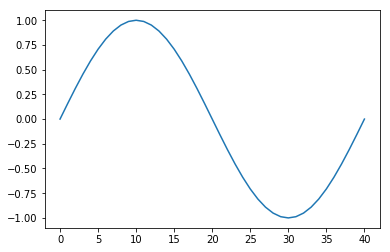

In [148]:
array = [np.sin(i) for i in np.arange(0,2*np.pi+np.pi/20,np.pi/20)]
s = pd.Series(array)
s.plot()

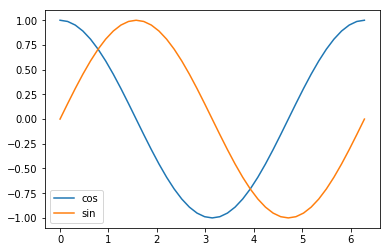

In [156]:
array1 = [np.sin(i) for i in np.arange(0,2*np.pi+np.pi/20,np.pi/20)]
array2 = [np.cos(i) for i in np.arange(0,2*np.pi+np.pi/20,np.pi/20)]
index1 = [i for i in np.arange(0,2*np.pi+np.pi/20,np.pi/20)]

df4 = pd.DataFrame({'sin':array1,'cos':array2},index=index1)
df4.plot()